    Building a Simple Linear Regression Model that tries to predict the future number of COVID-19 confirmed cases in some countries.
    
    This Machine Learning algorithm tries to find a correlation between the progression of confirmed cases in countries that have recently reported it's first cases to those that were infected earlier. 
    
    This correlation envolves the number of cases in target country each day, since it has reached X number of cases (X will be discussed later) and an average number of cases each day for an arbitrary set of countries (since X confirmed cases too).
    
    All data gathered belongs to https://ourworldindata.org/coronavirus-source-data
    
    Update: Brazil's Confirmed Cases 20 March 2020 - 640
    Source: g1.globo.com
    


    First Observations - Setting X
        Analysing country by country charts that shows the beggining of coronavirus's spread in different countries, it's clear that even for countries with similar progressions, the first days of each country vary a lot. Take for example:

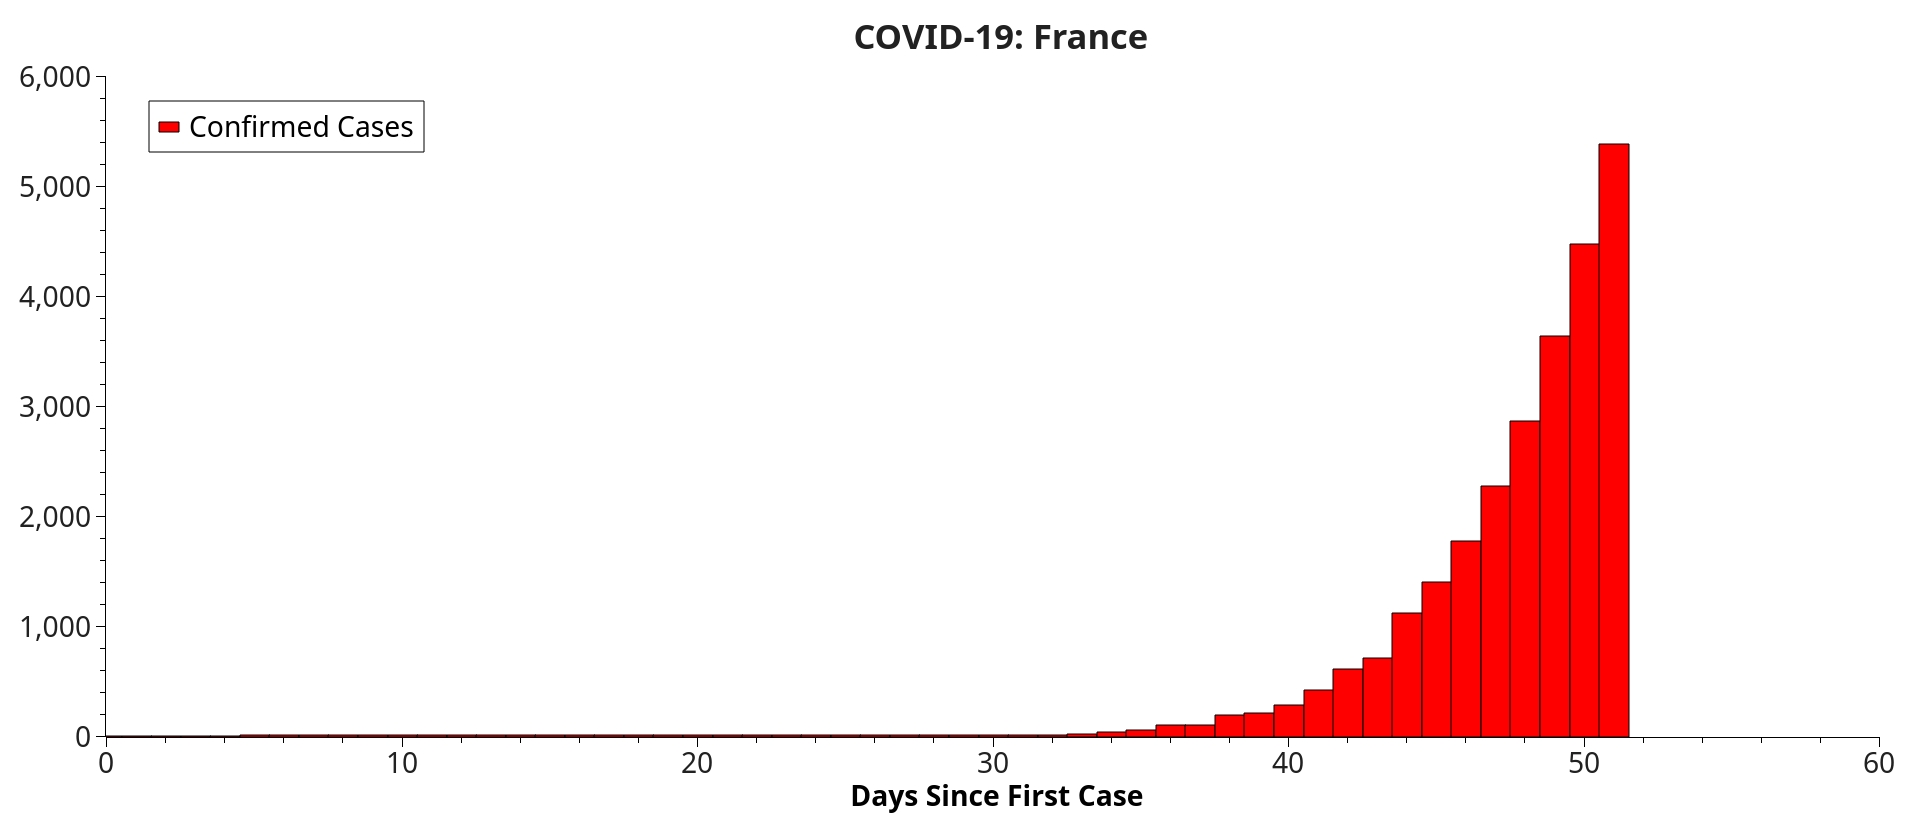

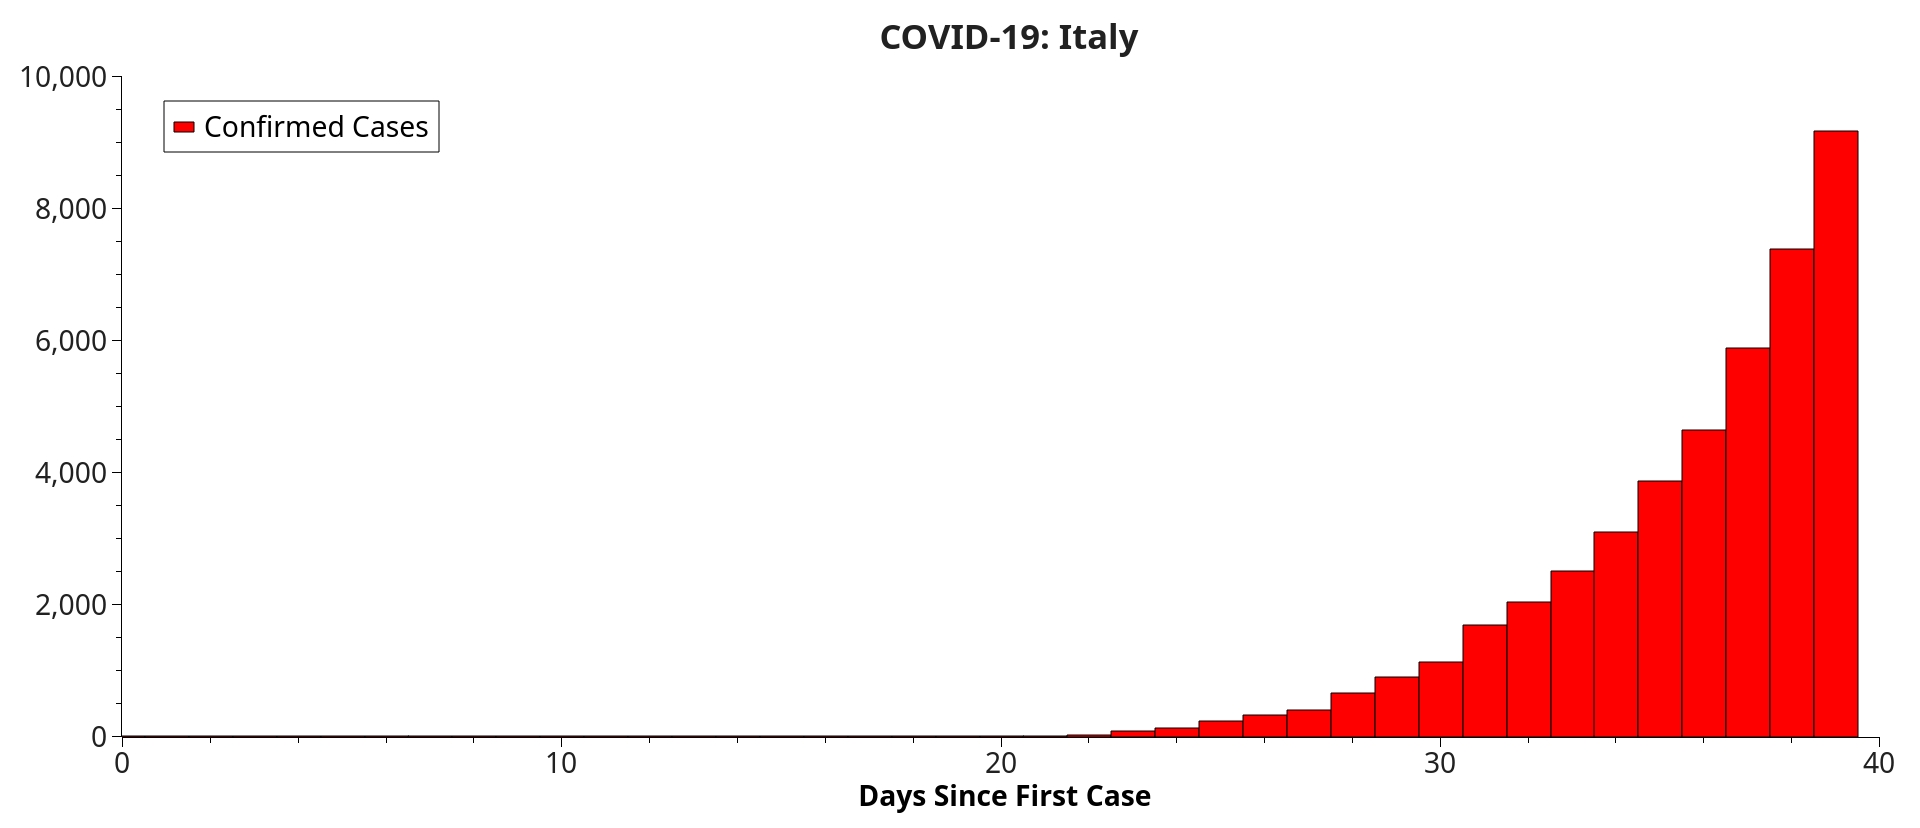

In [3]:
from IPython.display import display, Image
display(Image(filename='covidfrance.jpg'))
display(Image(filename='coviditaly.jpg'))

    Curves look similar, but let's take a look just at their first days.

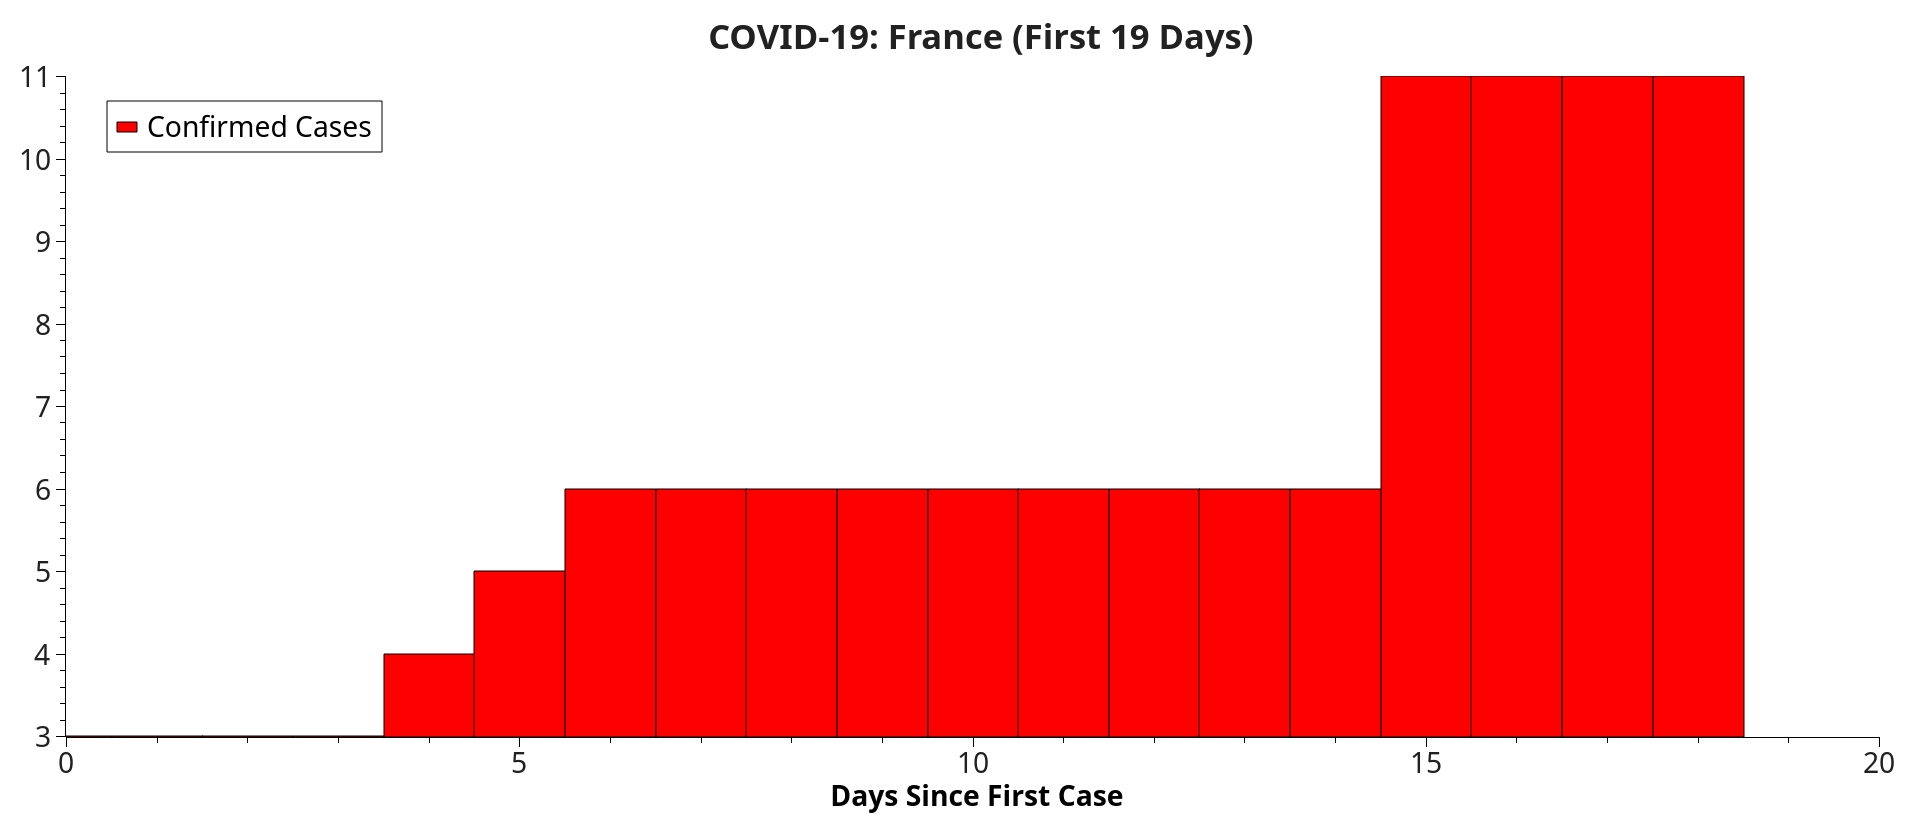

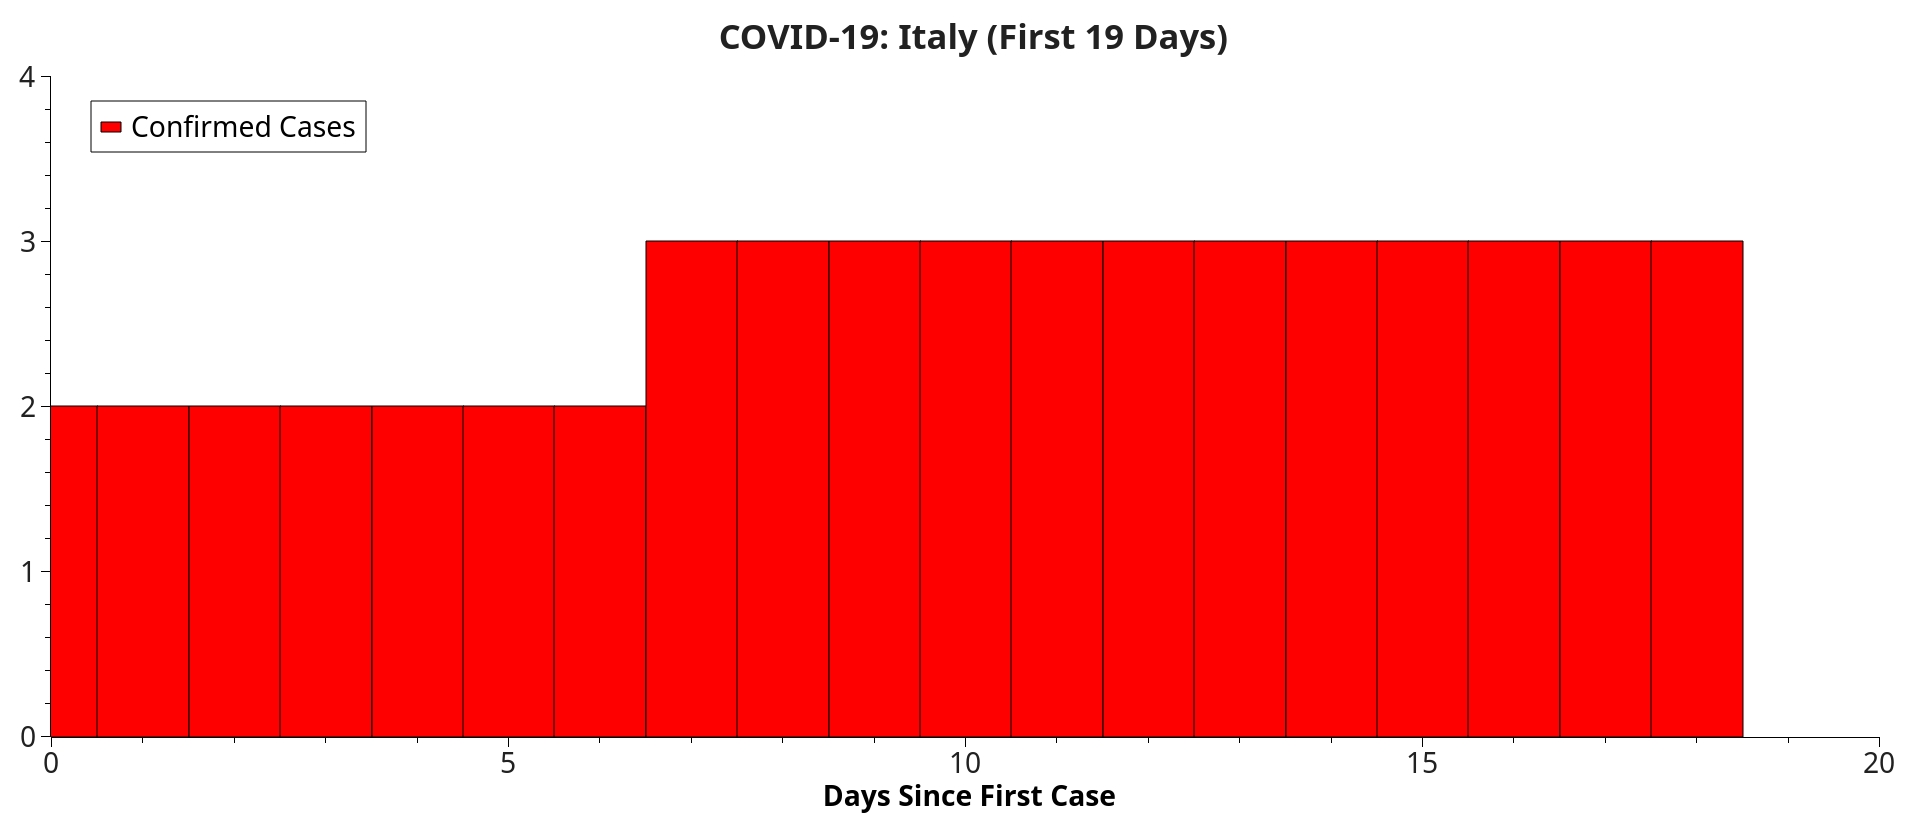

In [4]:
display(Image(filename='france-firstdays.jpg'))
display(Image(filename='italy-firstdays.jpg'))

    This lack of pattern occurs to many analysed countries, but they won't be discussed. Then, X will be set to 50 to discard the very first days (since our data suggests that once this interval is reached, the number of cases constantly increases.)

    Data Preprocessing

In [23]:
#Target Country: Brazil
#Considered in "Average Values: Spain, South Korea, France, Germany."
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data preprocessing

#loading data
dataset=pd.read_csv("data.csv")
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:, 1].values
#spliting into training data and testing data.
xtrain= x[0:9]
xtest= x[9:-1]
ytrain= y[0:9]

dataset.head()

,Average Values,Target Country
0,54,52.0
1,80,77.0
2,128,98.0
3,201,121.0
4,293,200.0


    Training Model

In [24]:
#import Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain, ytrain)
ypredict= regressor.predict(xtest)
import math
for i, x in enumerate(ypredict):
    ypredict[i]=math.ceil(x)
print(ypredict)    


[ 878. 1162. 1442. 1820. 2275.]


    Visualisation

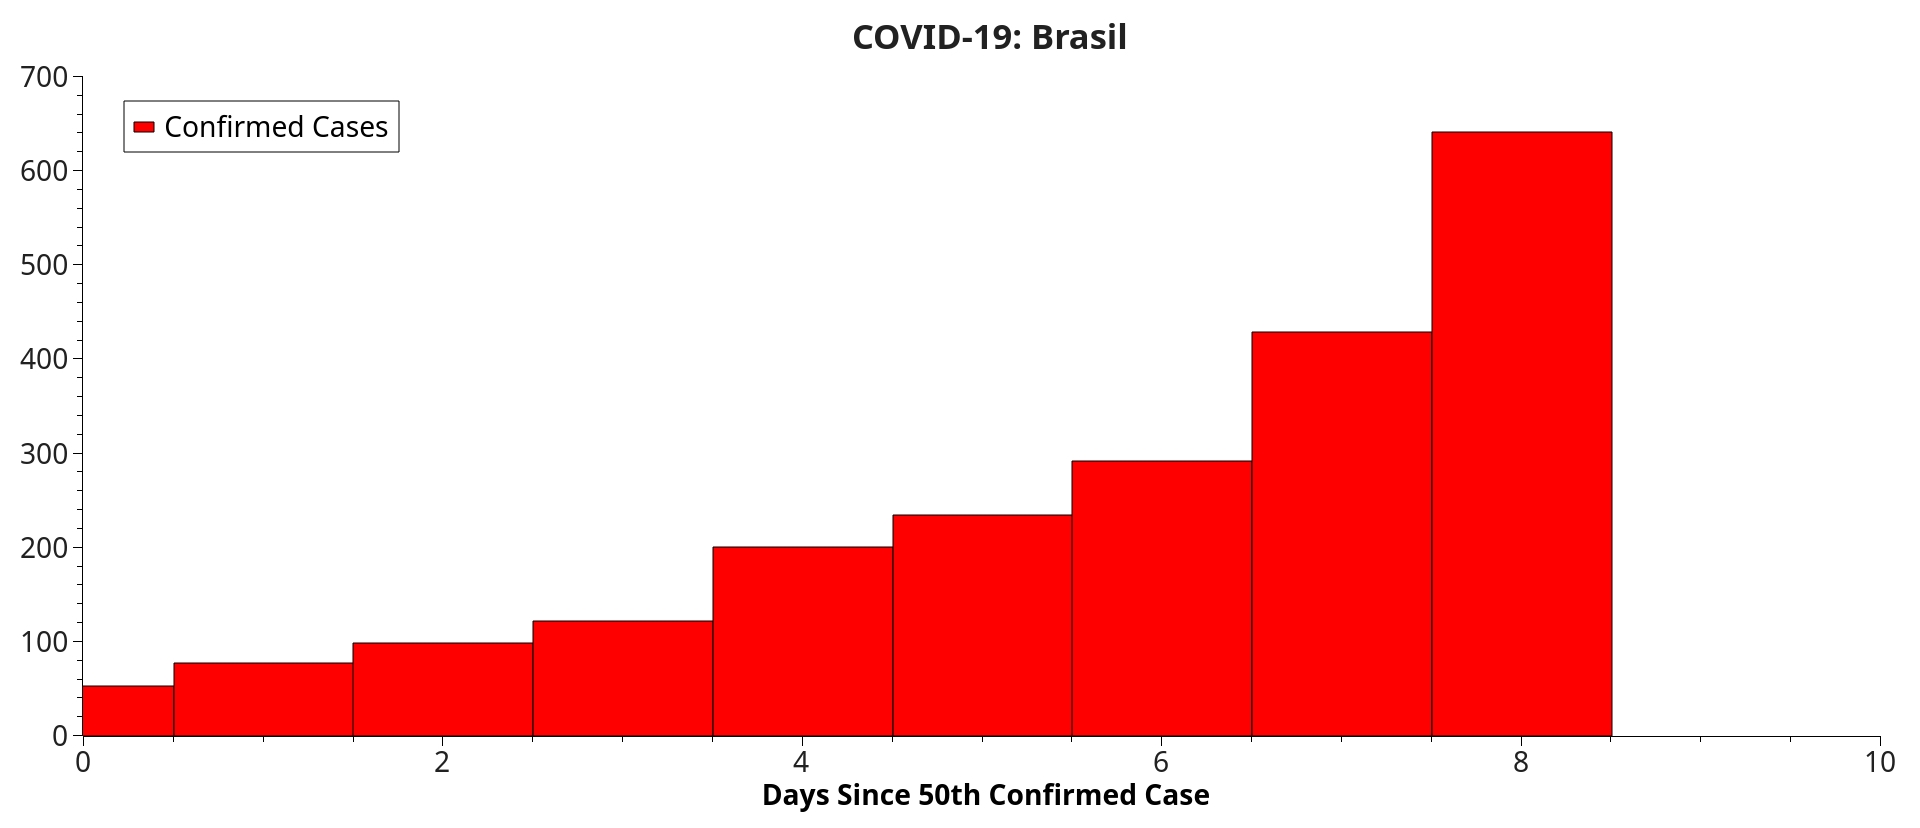

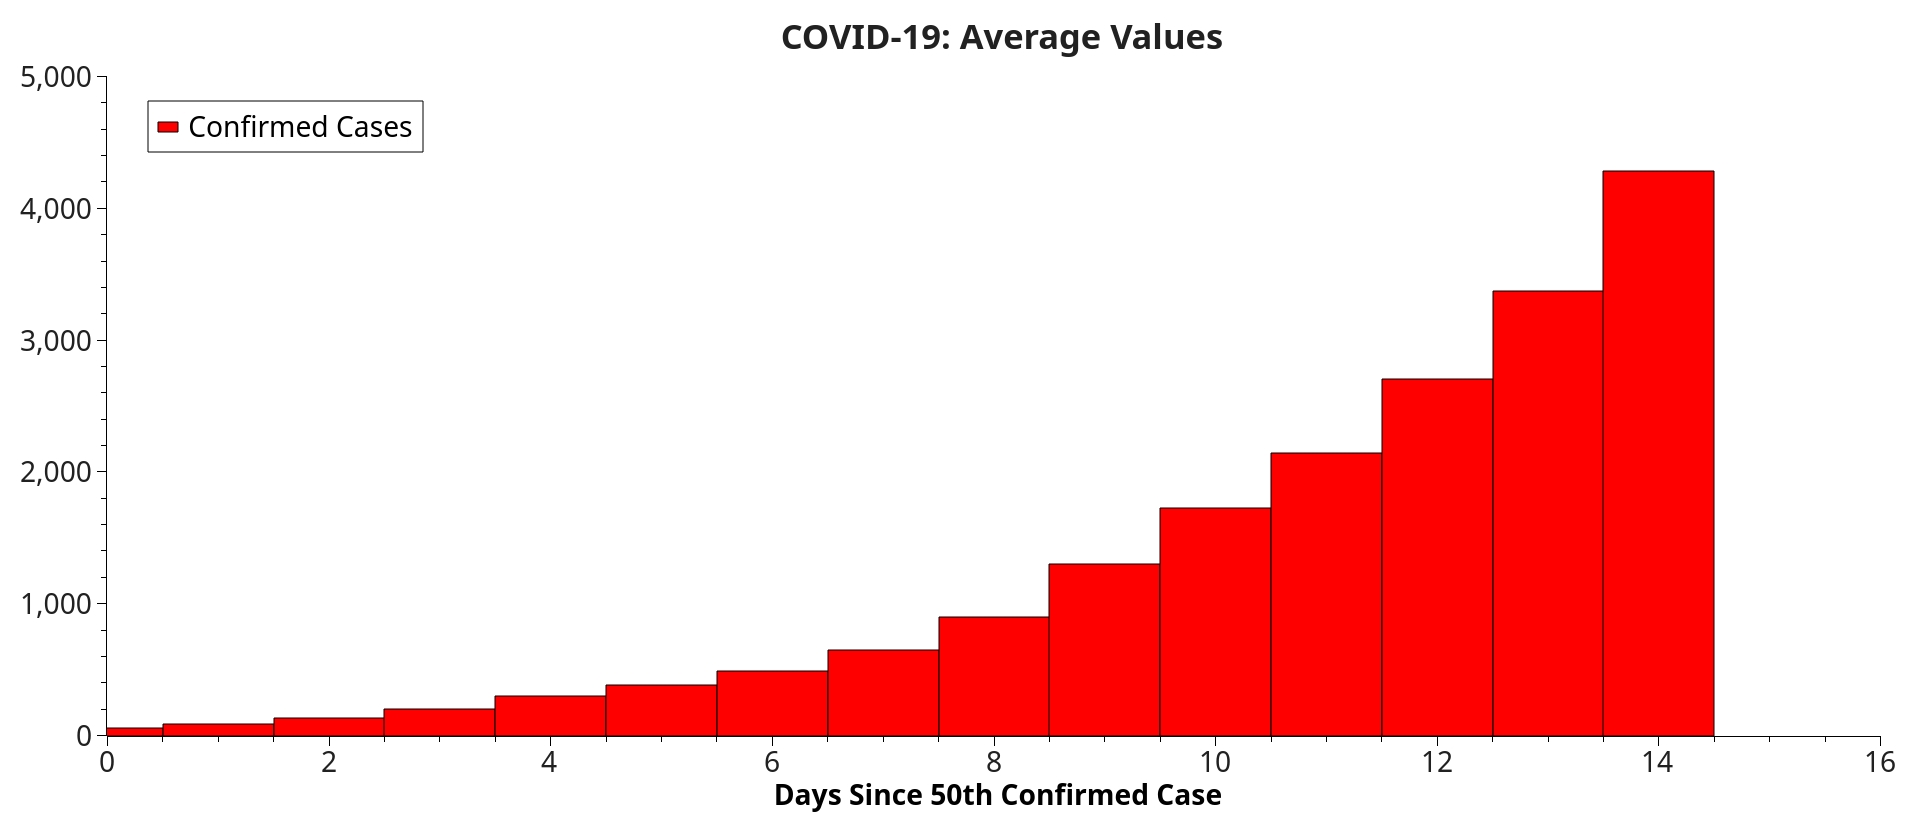

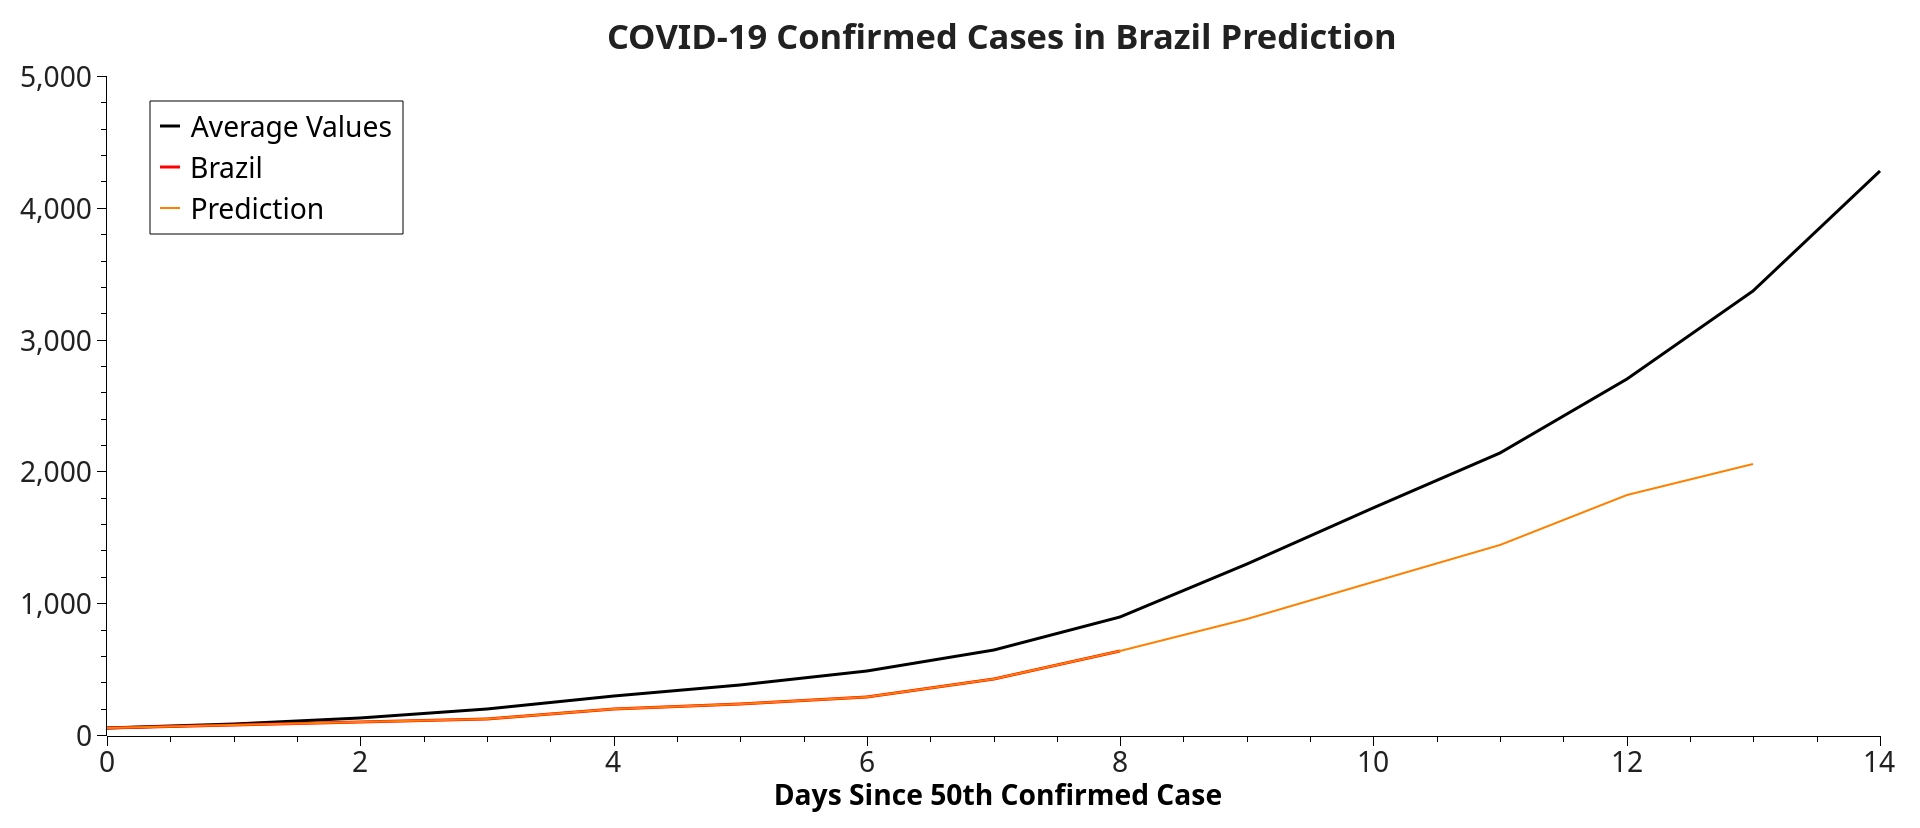

In [26]:
display(Image(filename='covidbrazil.jpg'))
display(Image(filename='average.jpg'))
display(Image(filename='prediction.jpg'))

Average Values:54, 80, 128, 201, 293, 376, 488, 637, 896, 1300, 1721, 2137, 2698, 3372, 4278

Brazil:52, 77, 98, 121, 200, 234, 291, 428, 640

